In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data-kopi.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Null values

In [6]:
df.isnull().any() #shows that are only null values in BMI. 



id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [7]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum() #Number of BMI rows that are null

bmi    201
dtype: int64

In [8]:
df = df.fillna(df.median()) #Fill all NaN with median

In [9]:
df.isnull().sum().sum()

0

Data overview

In [10]:
df['gender'].describe()

count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object

In [11]:
df['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [12]:
df['bmi'].describe()

count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [13]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [14]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [15]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [16]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Visualizations

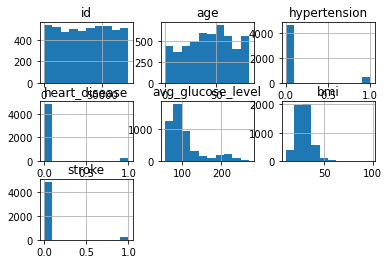

In [17]:
histograms = df.hist()

/Users/simoneetwil/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


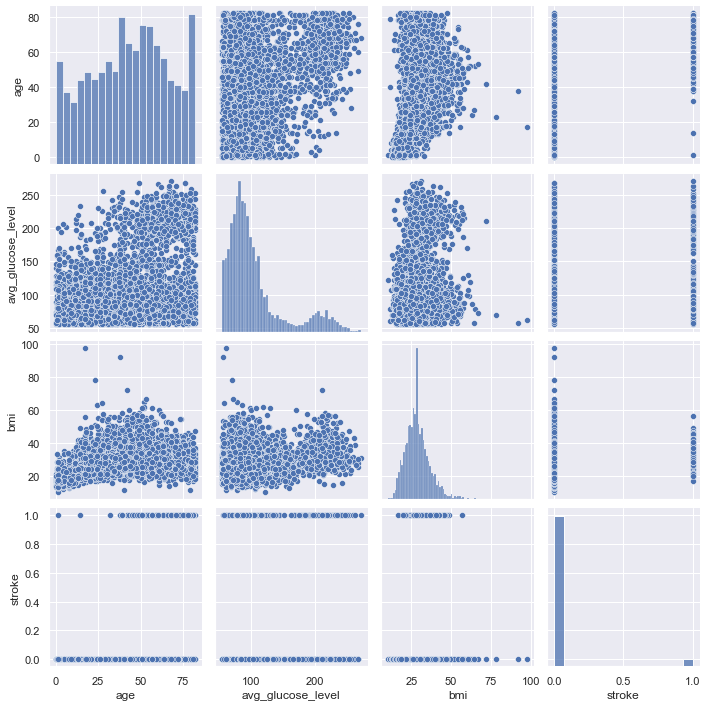

In [18]:
#scatterplot
sns.set()
cols = ['age', 'avg_glucose_level', 'bmi', 'stroke']
sns.pairplot(df[cols], size = 2.5)
plt.show();


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='bmi', ylabel='age'>

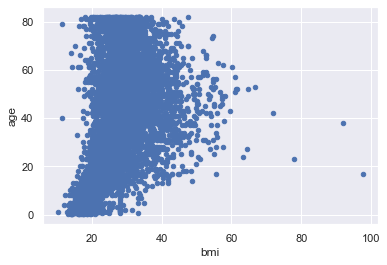

In [19]:
df.plot.scatter('bmi', 'age')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

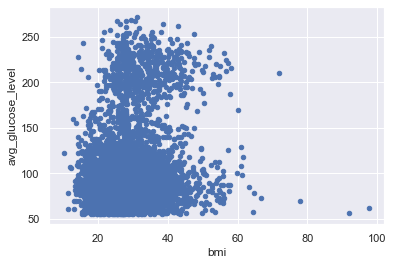

In [20]:
df.plot.scatter('bmi', 'avg_glucose_level')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

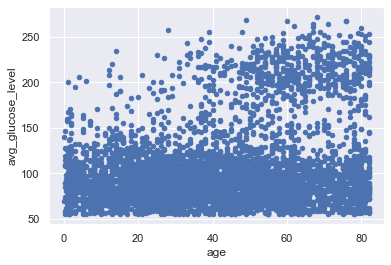

In [21]:
df.plot.scatter('age', 'avg_glucose_level')

Boxplots

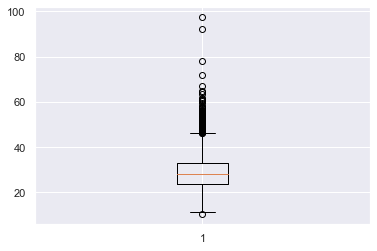

<Figure size 720x504 with 0 Axes>

In [22]:
#bmi
plt.boxplot(df['bmi'])
fig = plt.figure(figsize =(10, 7))
plt.show()

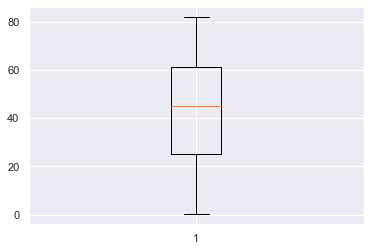

<Figure size 720x504 with 0 Axes>

In [23]:
#age
plt.boxplot(df['age'])
fig = plt.figure(figsize =(10, 7))
plt.show()

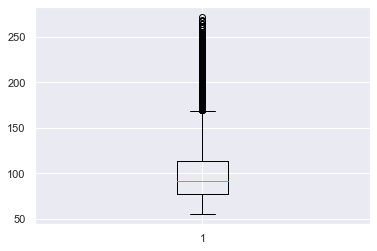

<Figure size 720x504 with 0 Axes>

In [24]:
#glucose
plt.boxplot(df['avg_glucose_level'])
fig = plt.figure(figsize =(10, 7))
plt.show()

Stroke and smoking

In [25]:
neversmoked = (df[df["smoking_status"]=="never smoked"].sum()["stroke"]/df[df["smoking_status"]=="never smoked"].count()["stroke"])*100

In [26]:
formerlysmoked = (df[df["smoking_status"]=="Unknown"].sum()["stroke"]/df[df["smoking_status"]=="Unknown"].count()["stroke"])*100

In [27]:
smokes = (df[df["smoking_status"]=="smokes"].sum()["stroke"]/df[df["smoking_status"]=="smokes"].count()["stroke"])*100

In [28]:
print(neversmoked, formerlysmoked, smokes)

4.7568710359408035 3.0440414507772022 5.323193916349809


Stroke and heart disease

In [29]:
heartdisease = (df[df["heart_disease"]==1].sum()["stroke"]/df[df["heart_disease"]==1].count()["stroke"])*100

In [30]:
noheartdisease = (df[df["heart_disease"]==0].sum()["stroke"]/df[df["heart_disease"]==0].count()["stroke"])*100

In [31]:
print(heartdisease, noheartdisease)

17.02898550724638 4.178733967728589


stroke and gender

In [32]:
male = (df[df["gender"]=='Male'].sum()["stroke"]/df[df["gender"]=='Male'].count()["stroke"])*100

In [33]:
female = (df[df["gender"]=='Female'].sum()["stroke"]/df[df["gender"]=='Female'].count()["stroke"])*100

In [34]:
print(male, female)

5.106382978723404 4.709418837675351


Strokes only

In [35]:
strokes = df[df["stroke"]==1]

In [36]:
nostroke = df[df["stroke"]==0]

In [39]:
strokes.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.090361,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,5.861877,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,27.000000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,28.100000,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,32.500000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


In [40]:
nostroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4861.0
mean,36487.236371,41.971545,0.088871,0.047110,104.795513,28.799115,0.0
std,21120.133386,22.291940,0.284586,0.211895,43.846069,7.777269,0.0
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.0
25%,17762.000000,24.000000,0.000000,0.000000,77.120000,23.600000,0.0
50%,36958.000000,43.000000,0.000000,0.000000,91.470000,28.100000,0.0
75%,54497.000000,59.000000,0.000000,0.000000,112.830000,32.800000,0.0
max,72940.000000,82.000000,1.000000,1.000000,267.760000,97.600000,0.0
